# Shortest path lengths

This notebook shows you how to build a matrix containing the length of the shortest path between nodes for a given graph.

In [1]:
#@title Imports
import numpy as np
from scipy.sparse.csgraph import floyd_warshall

# plot
import networkx as nx
import matplotlib.pyplot as plt

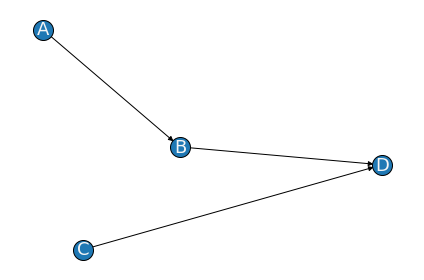

In [2]:
#@title Generate a synthetic graph
G = nx.DiGraph()

G.add_edge("A","B")
G.add_edge("B","D")
G.add_edge("C","D")

pos = nx.spring_layout(G)

options = {"edgecolors": "black", "node_size": 400}
nx.draw_networkx_nodes(G, pos, **options)
nx.draw_networkx_labels(G, pos, font_size=18, font_color="whitesmoke")
nx.draw_networkx_edges(G, pos, edge_color='k', arrows = True)

plt.tight_layout()
plt.axis("off")

plt.show()

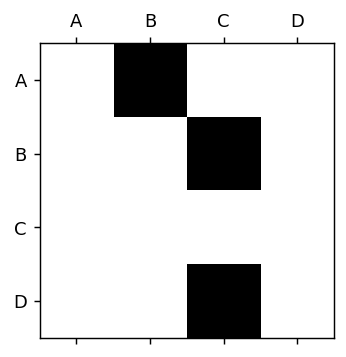

In [3]:
#@title Obtain the adjacency matrix of the generated graph
A = nx.adjacency_matrix(G, dtype=np.float32)

node_labels = sorted(list(G.nodes))

fig, axs = plt.subplots(figsize=(3,3), dpi=130)

axs.matshow(A.todense(), cmap='Greys')
axs.set_xticklabels([''] + node_labels)
axs.set_yticklabels([''] + node_labels)

plt.show()

Now, based on the adjacency matrix, the shortest path lengths are calculated using the [Floyd-Warshall algorithm](https://en.wikipedia.org/wiki/Floyd%E2%80%93Warshall_algorithm) as shown in the following line.

In [4]:
spmat = floyd_warshall(A, # adjacency matrix
                       directed=True, # the synthetic graph is directed
                       return_predecessors=False, 
                       unweighted=False,
                       overwrite=False)
spmat

array([[ 0.,  1.,  2., inf],
       [inf,  0.,  1., inf],
       [inf, inf,  0., inf],
       [inf, inf,  1.,  0.]])